<a href="https://colab.research.google.com/github/MontseFlores07/IAyRN_2025/blob/main/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Fundamental 7: Redes Neuronales Artificiales**

Montserrat Guadalupe Flores Flores 2055196 N5

Dylan Yahir Salazar Guardiola 2044839 N4

# Cargar librerías

In [1]:
# Cargar librerías
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargar datos

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Preprocesamiento de datos

In [3]:
# Preprocesamiento de datos
# Normalización
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Selección y entrenamiento del modelo.

In [4]:
# Creación de la red neuronal
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # capa de entrada
model.add(layers.Dense(128, activation='relu'))  # capa oculta
model.add(layers.Dense(10, activation='softmax'))  # capa de salida

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Entrenamiento
history = model.fit(train_data,
                    train_labels,
                    epochs=5,
                    batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8784 - loss: 0.4353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9634 - loss: 0.1269
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9778 - loss: 0.0761
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9833 - loss: 0.0559
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9870 - loss: 0.0429


# Prueba del modelo

In [7]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'\nExactitud en datos de prueba: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0922

Exactitud en datos de prueba: 0.9754


In [8]:
# Realizar 5 predicciones
predictions = model.predict(test_data)
for i in range(5):
    pred = np.argmax(predictions[i])
    real = np.argmax(test_labels[i])
    print(f'Predicción: {pred} | Real: {real}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicción: 7 | Real: 7
Predicción: 2 | Real: 2
Predicción: 1 | Real: 1
Predicción: 0 | Real: 0
Predicción: 4 | Real: 4


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


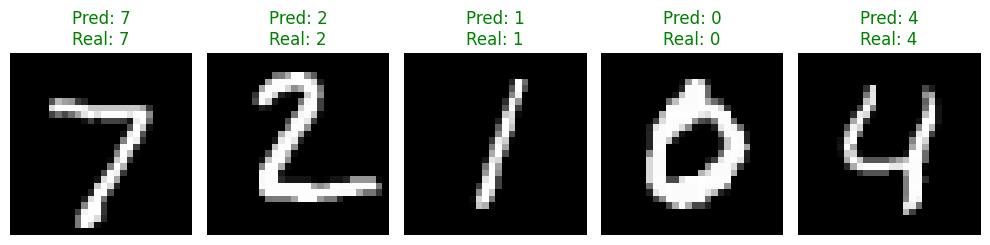

In [9]:
# Predicciones con visualización
predictions = model.predict(test_data)
plt.figure(figsize=(10, 10))

for i in range(5):
    # Mostrar imagen
    plt.subplot(1, 5, i+1)
    plt.imshow(test_data[i], cmap='gray')

    # Decodificar predicción y etiqueta real
    pred = np.argmax(predictions[i])
    real = np.argmax(test_labels[i])

    # Configurar título con color (rojo = error, verde = acierto)
    color = 'green' if pred == real else 'red'
    plt.title(f'Pred: {pred}\nReal: {real}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()